In [2]:
#import needed packages
import pickle
import random
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn import svm
from sklearn import metrics
import seaborn as sns
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier


In [3]:
#load in datasets
X_train_dict = pickle.load(open('X_train.pickle','rb'))
X_test_dict = pickle.load(open('X_test.pickle','rb'))
y_train_dict = pickle.load(open('y_train.pickle','rb'))
y_test_dict = pickle.load(open('y_test.pickle','rb'))
#print(X_train_dict)

Text(0.5, 0, 'class')

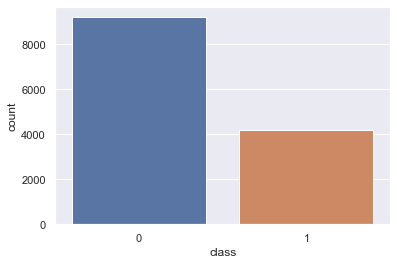

In [4]:
sns.set_theme(style="darkgrid")
ax1 = sns.countplot(x=y_test_dict)
ax2 = sns.countplot(x=y_train_dict)
plt.xlabel('class')

mean length of a sentence 77.3344768439108 characters


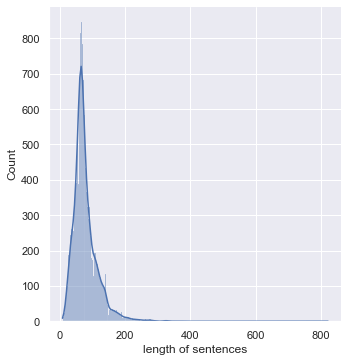

In [5]:
lengths = [len(i) for i in X_train_dict]
mean_length=np.mean(lengths)
sns.displot(x=lengths,kde=True)
plt.xlabel('length of sentences')
print('mean length of a sentence ' +str(mean_length)+' characters')

In [6]:
#replace all loose \n in text
X_train_dict=list(map(lambda x:re.sub('\\n', '', x.lower()),X_train_dict))
X_test_dict=list(map(lambda x:re.sub('\\n', '', x.lower()),X_test_dict))
#replace punctuation not apostrophy
X_train_dict=list(map(lambda x:re.sub("[^\w\s']", ' ', x),X_train_dict))
X_test_dict=list(map(lambda x:re.sub("[^\w\s']", ' ', x),X_test_dict))
#was going to replace contractions but could not fund a super great way to do so. best way resulted in me 
#downloading a 1.5 gb file, figured this wasnt the best lol. Maybe later in training and stuff https://pypi.org/project/pycontractions/

In [7]:
#embedding the dataset
#this takes a long time but it actually works! idk why bert just didnt work
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')
X_train_embeddings = model.encode(X_train_dict)
X_test_embeddings = model.encode(X_test_dict)

In [ ]:
# i think i misunderstood what we are doing a little bit

In [ ]:
#I can make an actual NN from scratch if needed but thats a lot of work and the premade one works reasonably well
nn = MLPClassifier(solver='adam', alpha=0.05,hidden_layer_sizes=(10, 10), random_state=1)
#model appears to be overfitting slightly, however when I increase regularizationit doesnt get better, more iteration is needed
#0.9529061102831594 accuracy

In [8]:
clf=svm.SVC(C=10)

In [9]:
#fit the training set
clf.fit(X_train_embeddings, y_train_dict)

SVC(C=10)

In [10]:
#score and test the data set
scoref=clf.score(X_test_embeddings, y_test_dict)
print(score1,scoref)
#pretty good

NameError: name 'score1' is not defined

In [12]:
holdr=clf.predict(X_test_embeddings)


In [21]:
df=pd.DataFrame(holdr)
df=df.rename(columns={0:'Prediction'})
fr=open('testing.csv','w')
df.to_csv(fr)
fr.close()

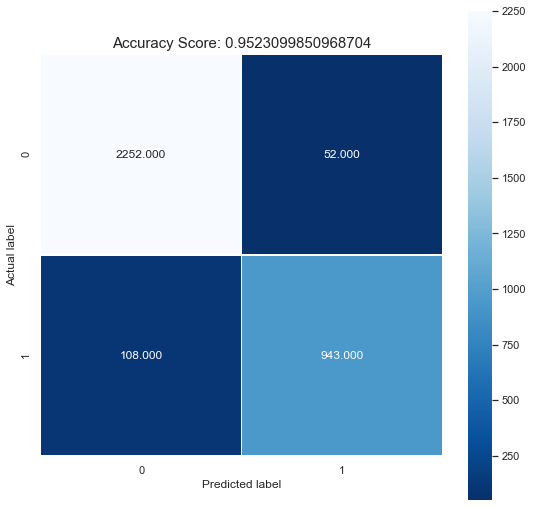

In [159]:
cm = metrics.confusion_matrix(y_test_dict, clf.predict(X_test_embeddings))
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(scoref)
plt.title(all_sample_title, size = 15);

In [53]:
#try dataset on logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000).fit(X_train_embeddings, y_train_dict)

score1=lr.score(X_train_embeddings, y_train_dict)
scoref=lr.score(X_test_embeddings, y_test_dict)
print(score1,scoref)

0.9616675367290626 0.9391952309985097


In [17]:
'''from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train_embeddings, y_train_dict)

score1=gnb.score(X_train_embeddings, y_train_dict)
scoref=gnb.score(X_test_embeddings, y_test_dict)
print(score1,scoref)'''
#not good

0.8248191513162801 0.8315946348733234


In [18]:
'''from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_features= 'auto', min_samples_leaf= 1, n_estimators= 200).fit(X_train_embeddings, y_train_dict)
score1=gnb.score(X_train_embeddings, y_train_dict)
scoref=gnb.score(X_test_embeddings, y_test_dict)
print(score1,scoref)'''

0.8248191513162801 0.8315946348733234


In [160]:
nn = MLPClassifier(solver='adam', alpha=2.47,hidden_layer_sizes=(20, 5), random_state=1)
#MLPClassifier(solver='adam', alpha=1.69,hidden_layer_sizes=(15, 10), random_state=1) about 94.8
nn.fit(X_train_embeddings, y_train_dict)
score1=nn.score(X_train_embeddings, y_train_dict)
scoref=nn.score(X_test_embeddings, y_test_dict)
print(score1,scoref)

0.9639794168096055 0.9487332339791357


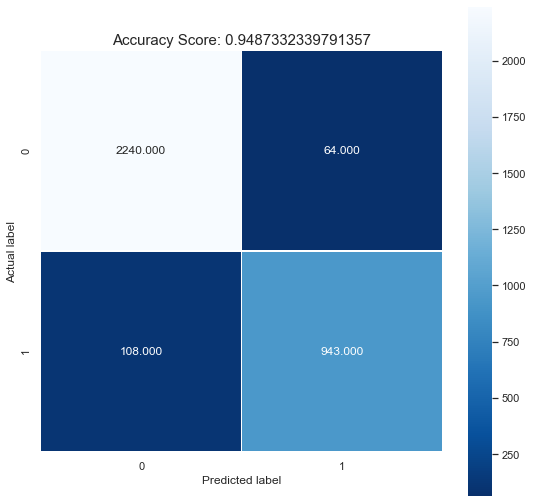

In [161]:
cm = metrics.confusion_matrix(y_test_dict, nn.predict(X_test_embeddings))
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(scoref)
plt.title(all_sample_title, size = 15);